In [243]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading data:

In [244]:
Election_data=pd.read_csv('ElectionData.csv')

### EDA

In [245]:
Election_data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [246]:
Election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

* Dataset contains 28 attributes

* Dataset contains int,float and object types

* Dataset does not contains any null values 

In [247]:
Election_data.iloc[:,0:15].describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000


* Dataset contains data starting from time 0 minutes to 265 minutes and data collected every 5 minutes

* In Mandates the gap between 75% and maximum values is very high

* MOre than 90 % values of Parishes lie within 1 Standard Dev from mean

* Minimun blank votes are 19 and maximum is approx 130000

* min null votes are 39 and max are 88539

* Highest no of subscribed voters are approx 9300000 and minimum 5700000

* Total voters ranges from min of 2833 to maximum of 5000000 hence Range is very high

In [248]:
Election_data.iloc[:,15:].describe()

,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


* Mandates have most of 0 values 
* WE can see that min no of party votes is 1 and max is 1800000
* 75% of Hondt and target values are 0

In [249]:
print(Election_data.head(1))
print(Election_data.tail(1))

   TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66   

   pre.subscribedVoters  pre.totalVoters  Party  Mandates  Percentage  \
0                813743           428546     PS         0       38.29   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  

[1 rows x 28 columns]
       TimeElapsed                 time territoryName  totalMandates  \
21642          265  2019-10-07 00:35:01         Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
21642                  0          277                  277        4995   

 

* This data is collected starting from time 06-Oct-2019 20:10:02 and end time is 07-Oct-2019 00:35:01
* Data collected every 5 minutes. Total duration is minutes for which data is collected is 265

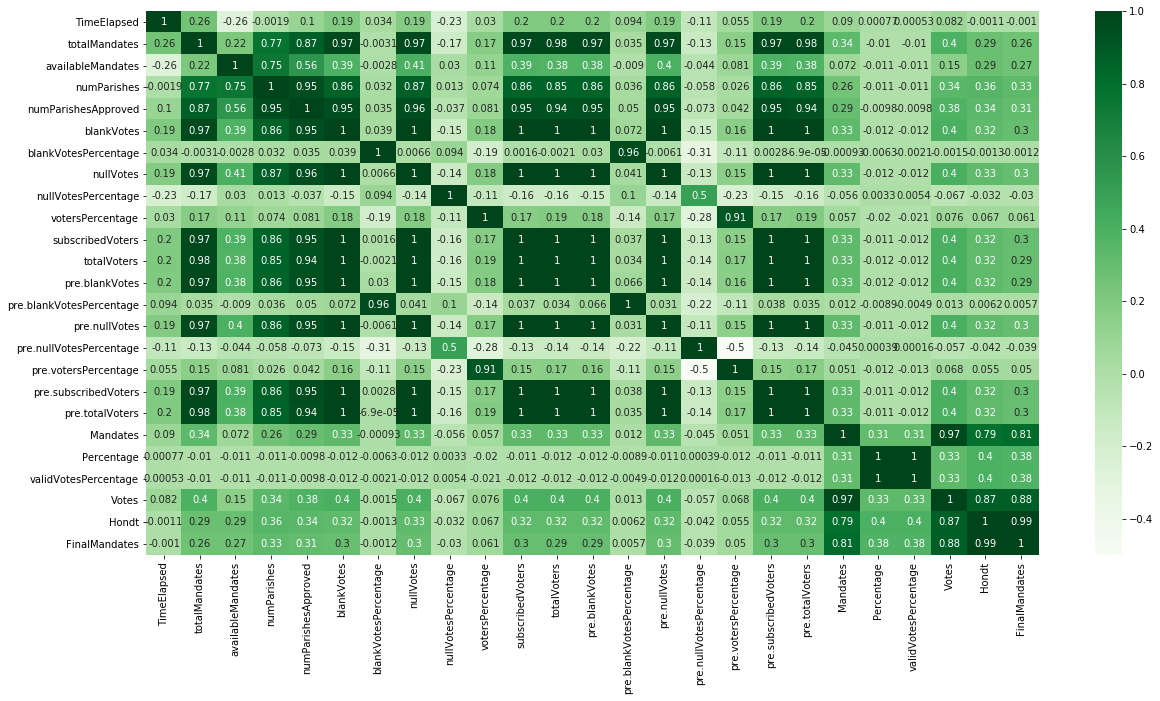

In [250]:
import seaborn as sb
plt.figure(figsize=(20,10))
sb.heatmap(Election_data.corr(),annot=True,cmap='Greens')

* Dataset has very huge multicollenearity issue for some attribute pairs
* (subscribedVoters,TotalVoters) have correlation of 1 Hence We will be dropping subscribed voters and will go with total voters in case of vote count
* (Percentage,ValidVotesPercentage) have correlation of 1 Hence We will be dropping percentage and will go with ValidVotesPercentage in case of party votes percentage
* Blankvotes and null votes have correlation of 1 hence we will drop blank votes and will go with null votes

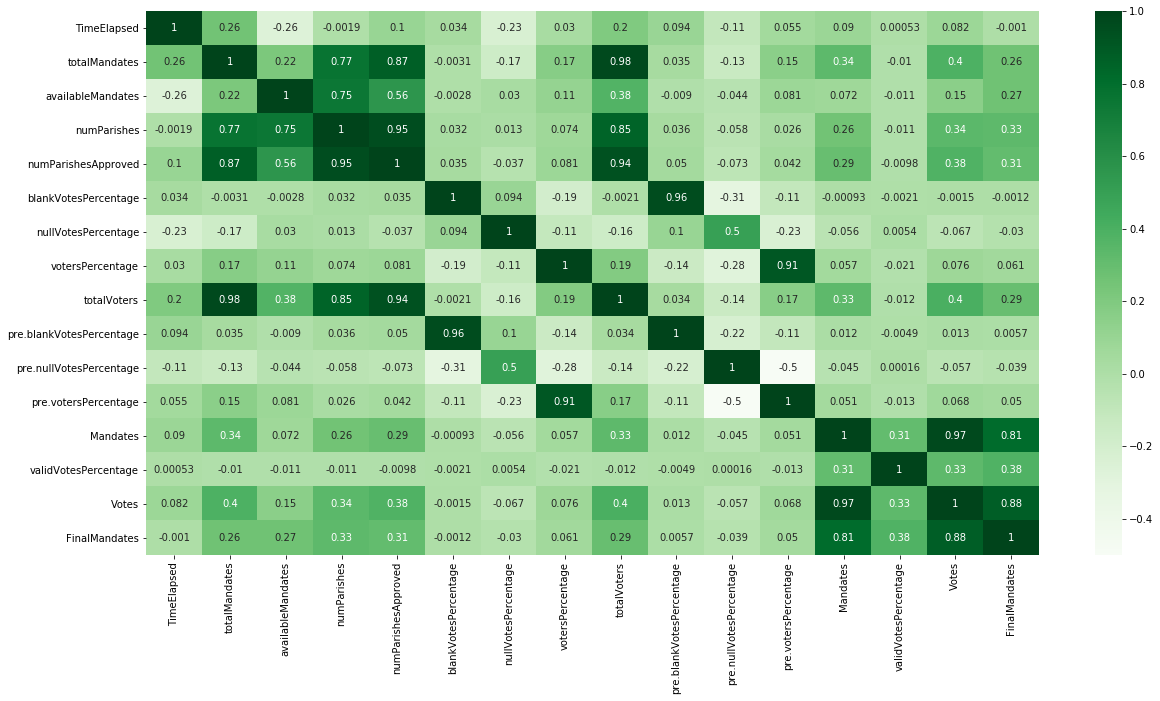

In [251]:
Election_data.drop(['blankVotes','pre.blankVotes','subscribedVoters','pre.subscribedVoters','nullVotes','Hondt','pre.nullVotes','pre.totalVoters','pre.nullVotes','pre.nullVotes','Percentage','pre.totalVoters'],axis=1,inplace=True)
plt.figure(figsize=(20,10))
sb.heatmap(Election_data.corr(),annot=True,cmap='Greens')

* Attributes which had correlation of 1 are removed from dataset

In [252]:
# checking total territory available
print(Election_data['territoryName'].unique())
print(len(Election_data['territoryName'].unique()))

['Território Nacional' 'Aveiro' 'Beja' 'Braga' 'Bragança' 'Castelo Branco'
 'Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Madeira'
 'Portalegre' 'Porto' 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real'
 'Viseu' 'Açores']
21


* Data available for 21 territory

In [253]:
# checking total Parties available
print(Election_data['Party'].unique())
print(len(Election_data['Party'].unique()))

['PS' 'PPD/PSD' 'B.E.' 'CDS-PP' 'PCP-PEV' 'PAN' 'CH' 'R.I.R.' 'PCTP/MRPP'
 'A' 'L' 'IL' 'JPP' 'NC' 'PDR' 'PNR' 'PURP' 'PPM' 'MPT' 'PTP' 'MAS']
21


* 21 Parties took part in election

In [254]:
# Checking Total number of seats on which election was held
df_=Election_data[Election_data['TimeElapsed']==0]
df_.groupby(['TimeElapsed']).sum()['FinalMandates']

TimeElapsed
0    447
Name: FinalMandates, dtype: int64

* Election held on 447 seats in total

MultiIndex([(226, 'Território Nacional')],
           names=['sum', 'territoryName'])
MultiIndex([(2, 'Portalegre')],
           names=['sum', 'territoryName'])


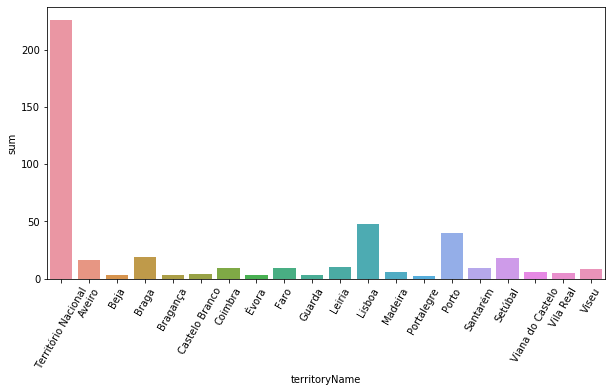

In [255]:
# checking territory wise total number of positions:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df_=Election_data[Election_data['TimeElapsed']==0]
df_['sum']=df_['totalMandates']+df_['availableMandates']
sb.barplot(x='territoryName',y='sum',data=df_)
print(df_.groupby(['sum','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df_.groupby(['sum','territoryName']).count().sort_index().head(1).index)

* Territory 'Território Nacional' has highest numnber of MP seats for election
* Territory 'Portalegre' has least numnber of numnber of MP seats for election

MultiIndex([(386497, 'Território Nacional')],
           names=['totalVoters', 'territoryName'])
MultiIndex([(2833, 'Setúbal')],
           names=['totalVoters', 'territoryName'])


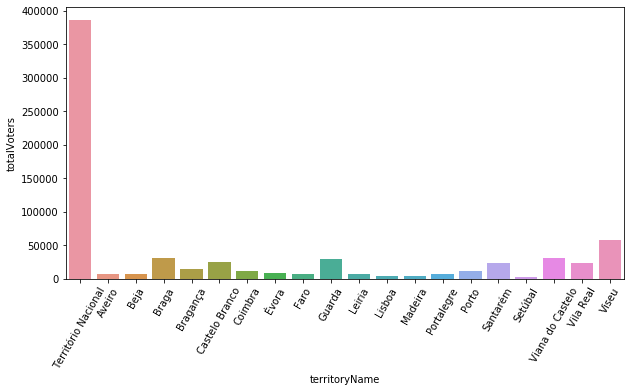

In [256]:
# Viewing territory wise  total voters 
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==0]
sb.barplot(x='territoryName',y='totalVoters',data=df)
print(df.groupby(['totalVoters','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['totalVoters','territoryName']).count().sort_index().head(1).index)

* Territory 'Território Nacional' has highest numnber of voters
* Territory 'Setúbal' has least numnber of voters

MultiIndex([(3091, 'Território Nacional')],
           names=['numParishesApproved', 'territoryName'])
MultiIndex([(54, 'Madeira')],
           names=['numParishesApproved', 'territoryName'])


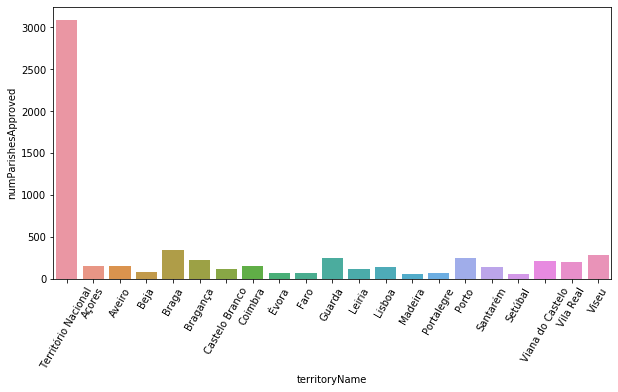

In [257]:
# Viewing territory wise  total parishes approved for election 
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==260]
#df=Election_data.copy()
sb.barplot(x='territoryName',y='numParishesApproved',data=df)
print(df.groupby(['numParishesApproved','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['numParishesApproved','territoryName']).count().sort_index().head(1).index)

MultiIndex([(147993, 'Território Nacional')],
           names=['Votes', 'territoryName'])
MultiIndex([(1, 'Madeira')],
           names=['Votes', 'territoryName'])


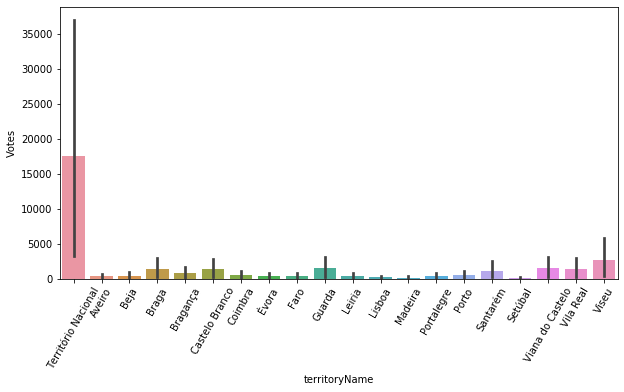

In [258]:
# Viewing territory wise  total number of party votes
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==0]
#df=Election_data.copy()
sb.barplot(x='territoryName',y='Votes',data=df)
print(df.groupby(['Votes','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['Votes','territoryName']).count().sort_index().head(1).index)

* Territorio Nacional had maximum number of party votes
* Madeira had minimum number of Party votes

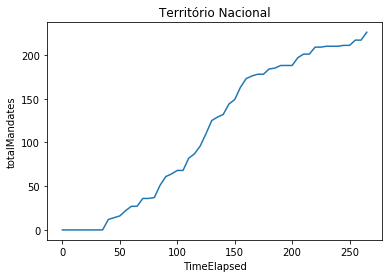

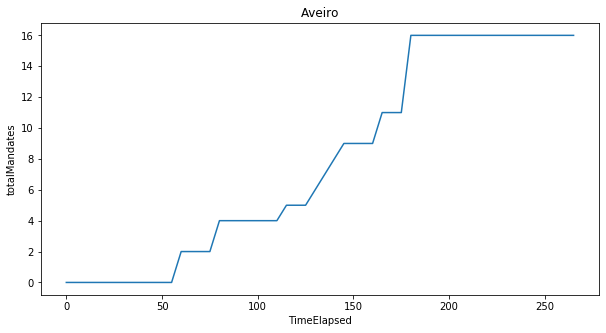

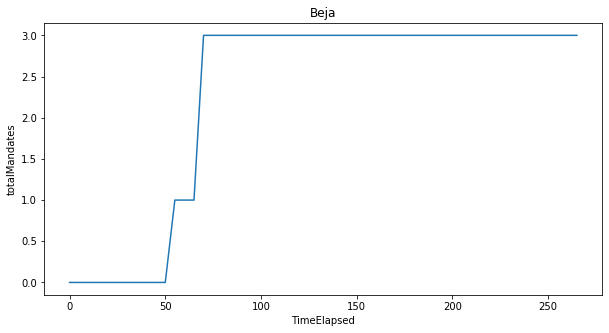

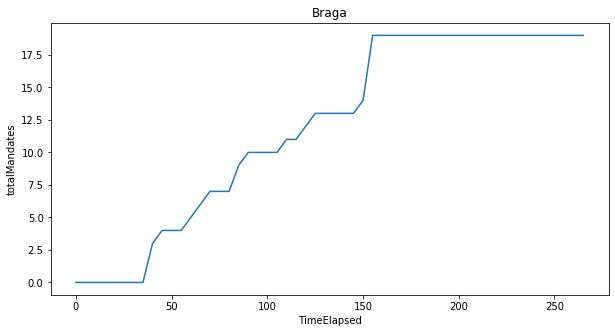

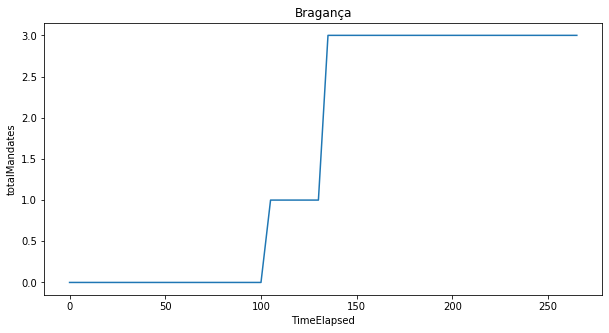

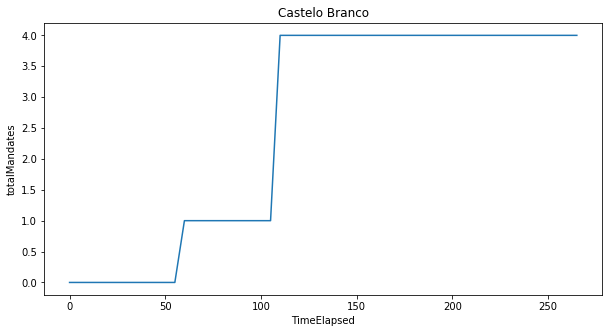

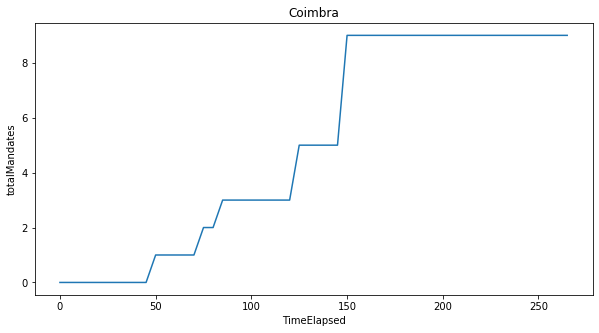

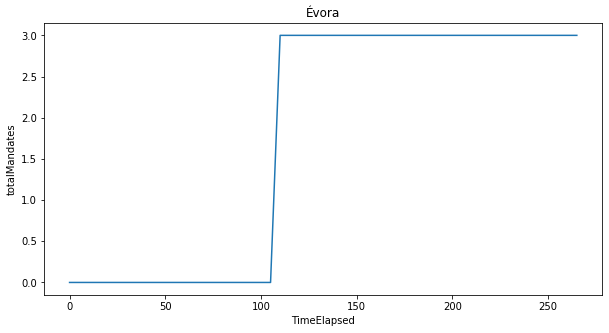

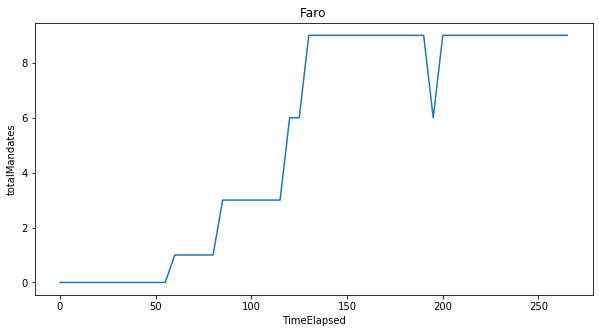

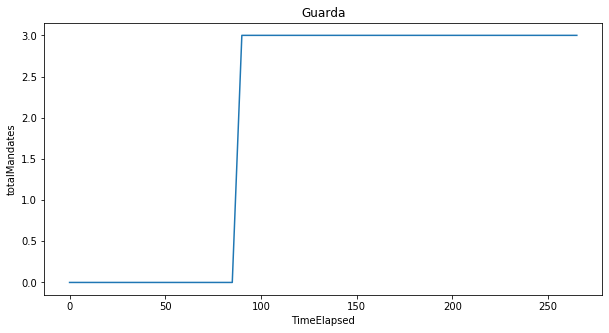

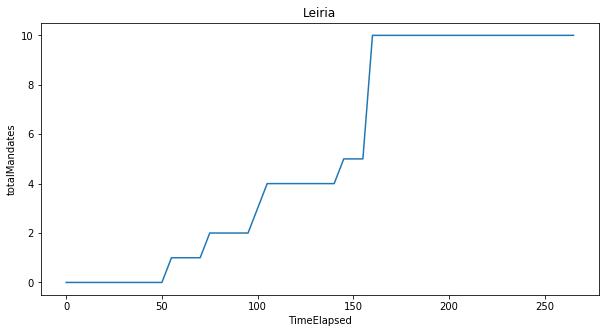

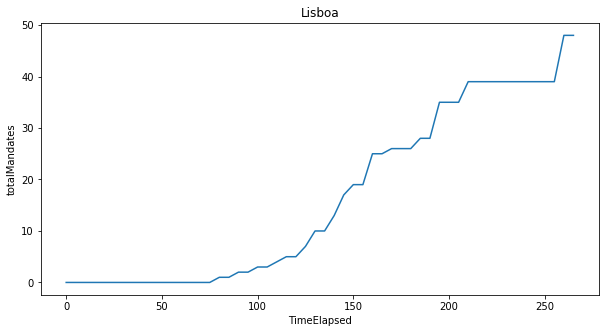

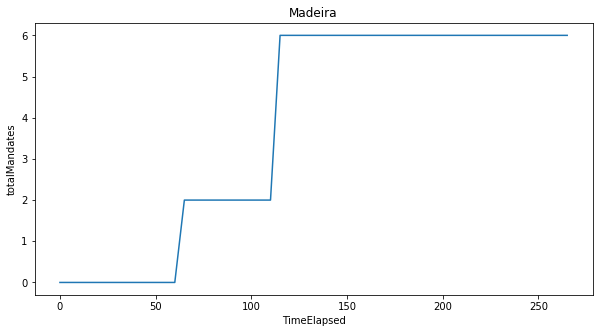

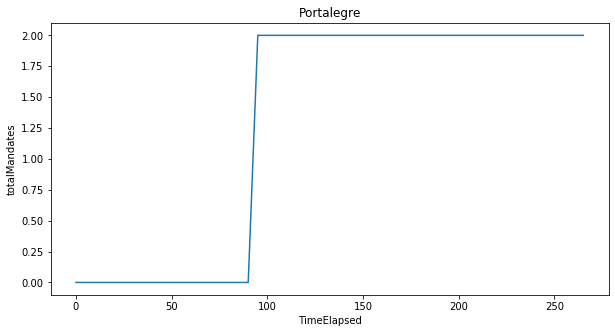

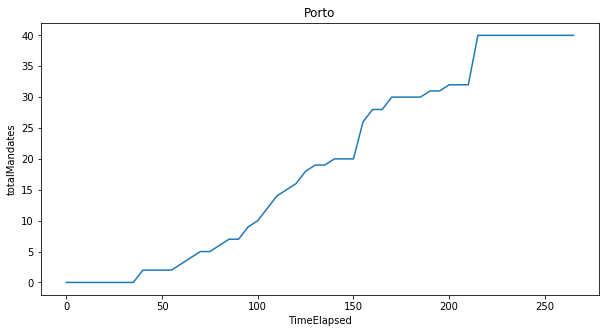

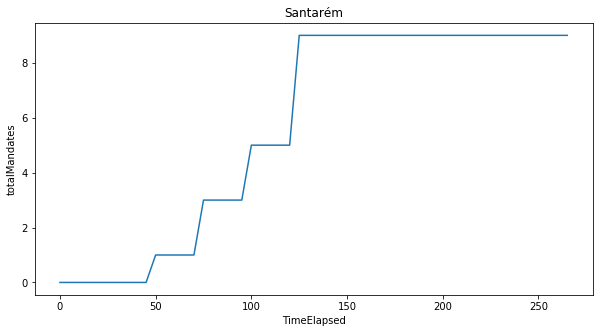

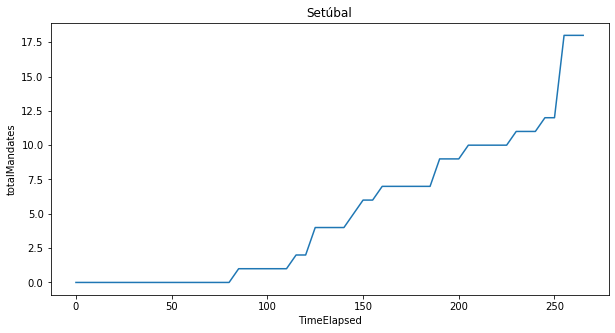

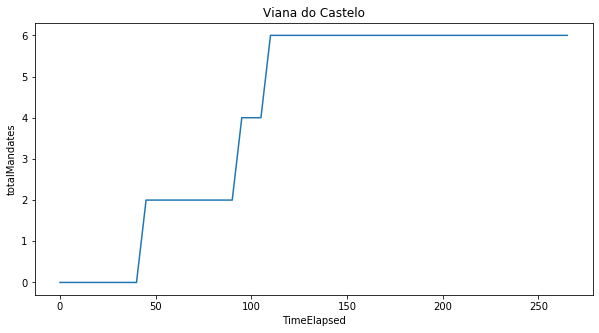

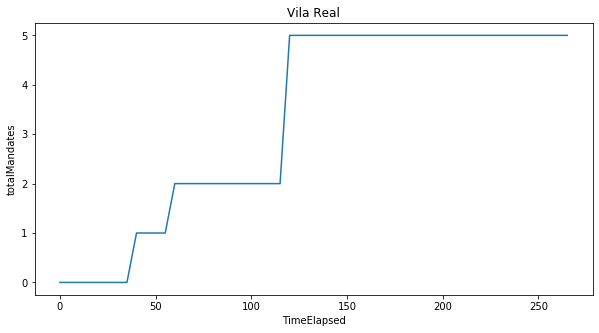

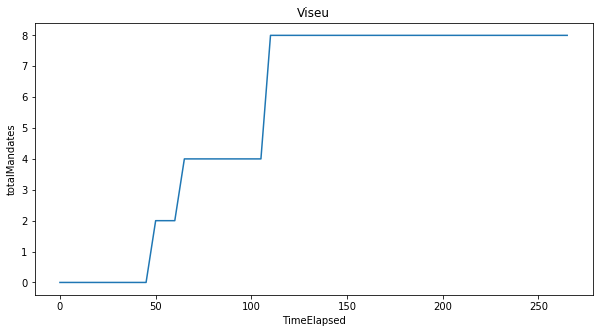

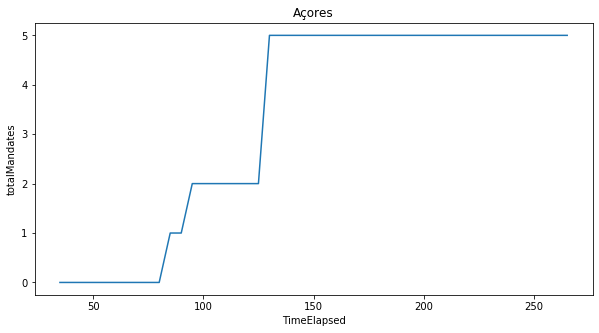

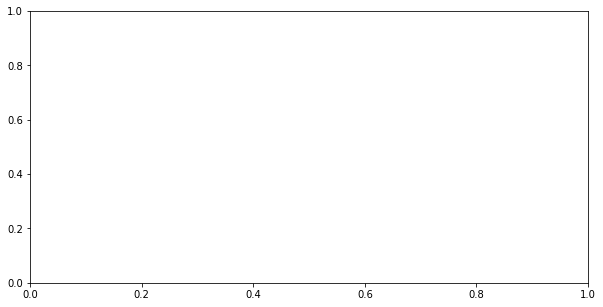

In [426]:
# Viewing timely  increase in numner of MP's elected for each territory

for i in Election_data['territoryName'].unique():
    df1=Election_data[Election_data['territoryName']==i]
    df2=df1.groupby(['TimeElapsed','totalMandates']).sum()
    plt.title(i)
    sb.lineplot(x=df2.index.get_level_values(0),y=df2.index.get_level_values(1),data=df2)
    plt.subplots(figsize=(10,5))


* MP count for Territorio Nacional is almost linear with time
* MP count for Aveiro is going flat after 180 means no MP elected after count exceeded 180. 2 MP's elected in one hour
* In Beja all MP's were elected in 50 minutes 
* In Braga approx 5 Mp's were elected in one hour.No MP were elceted after 150 minutes
* In Braganca no Mp elected in first 100 minutes. And then in another 50 minutes all MP's were elected
* Highest steep curve is for Evora and Guarda where at around 100 minutes after the data collection started all MP were elected
* IN Faro there was a time when MP count was decreased by around 2 and then increased.

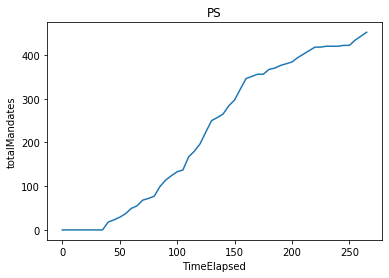

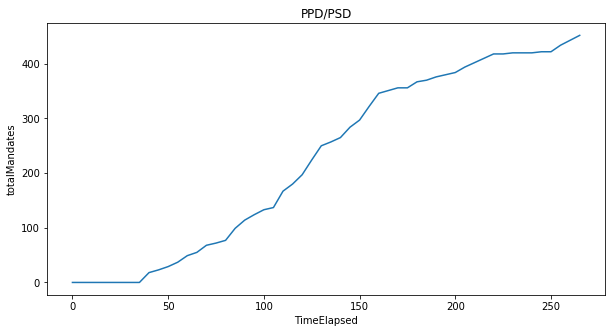

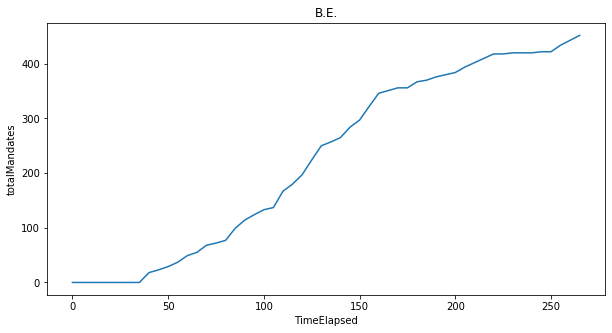

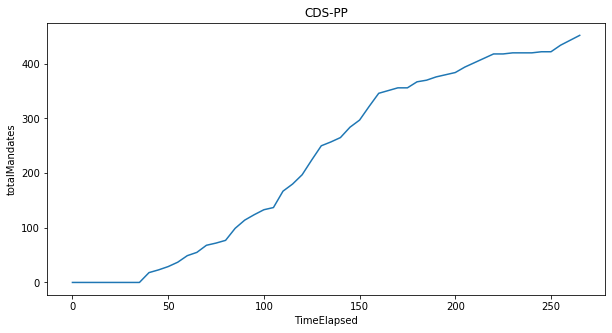

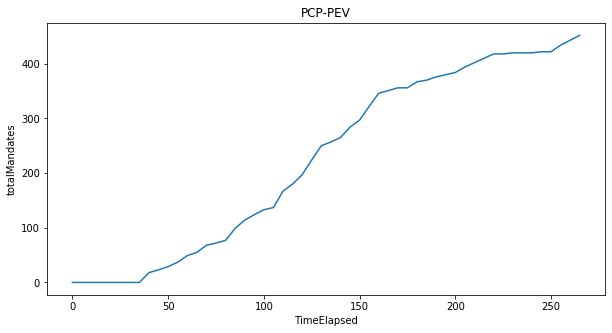

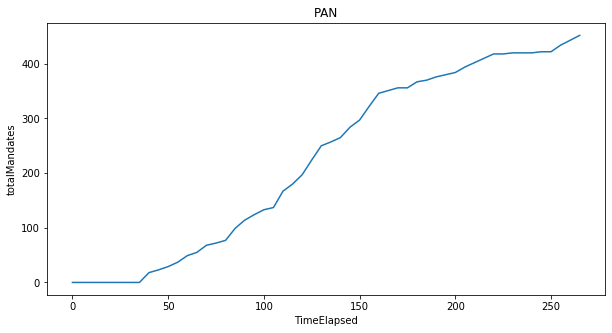

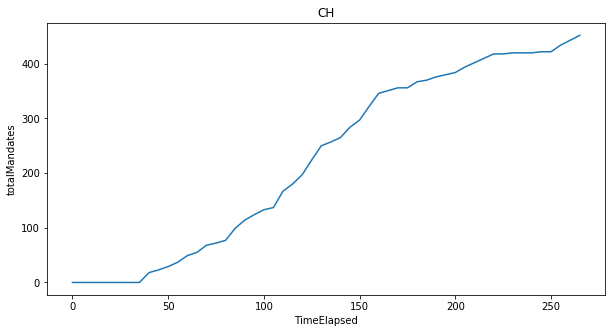

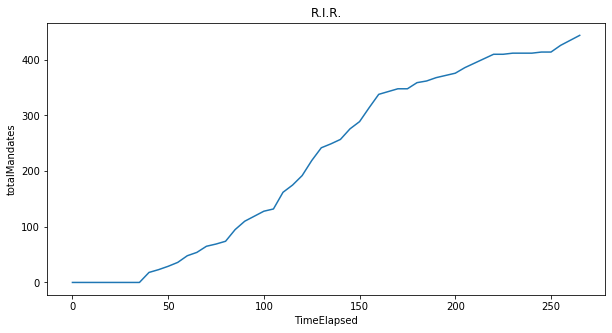

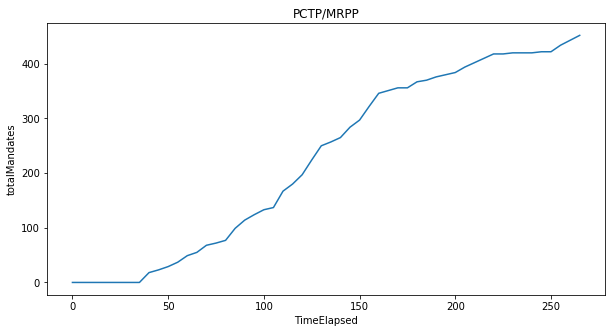

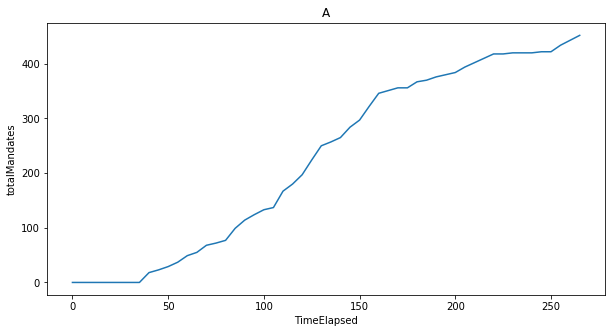

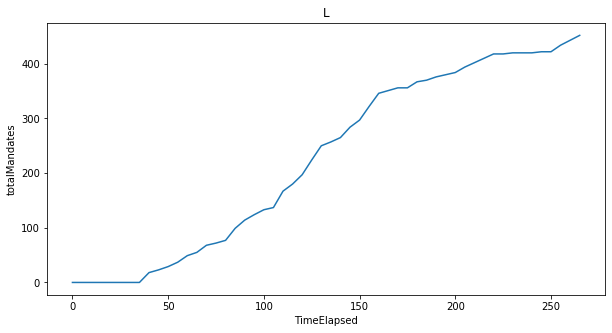

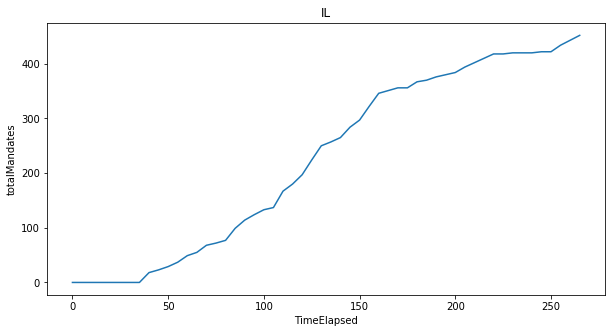

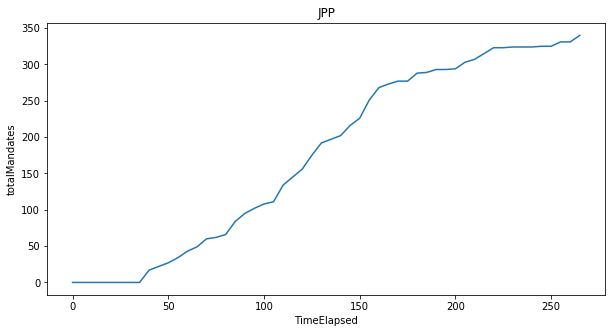

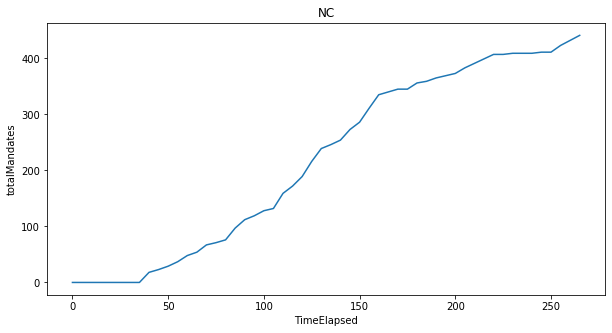

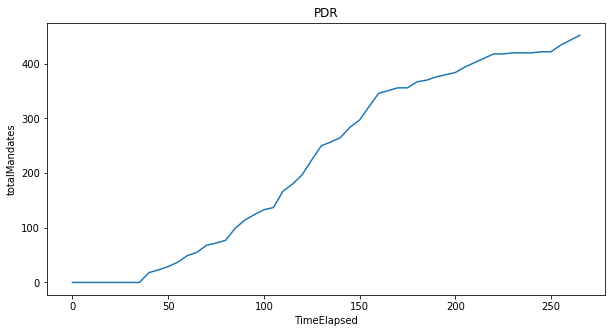

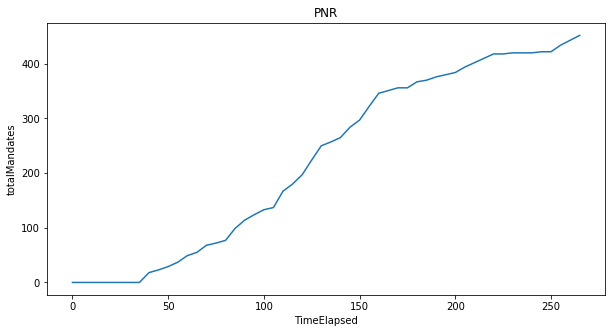

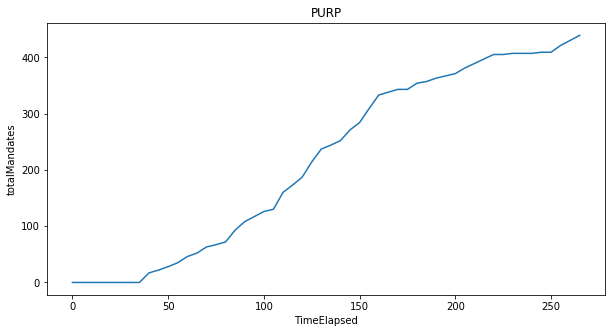

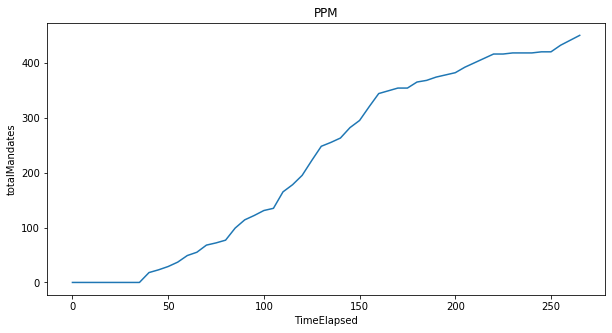

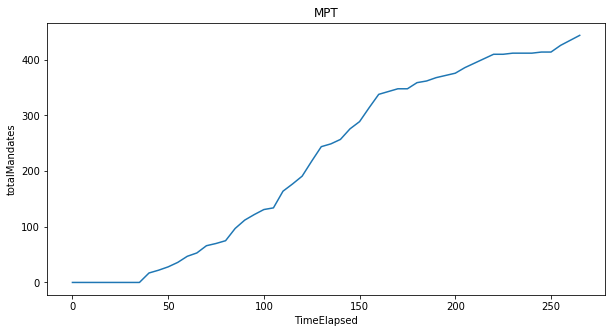

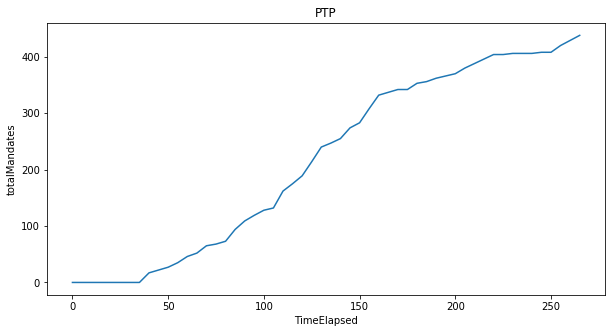

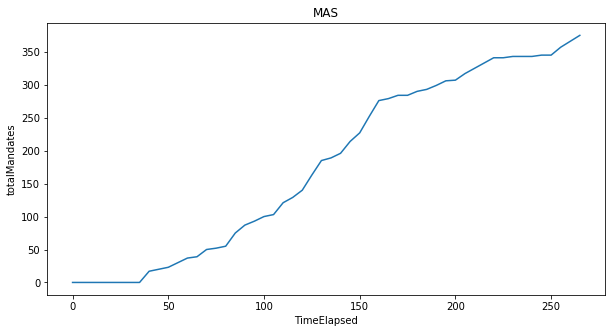

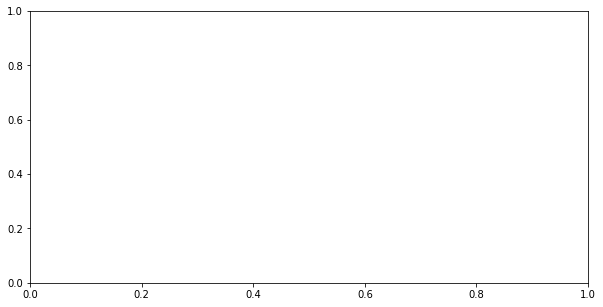

In [439]:
# Viewing timely  increase in numner of MP's elected for each Party

for i in Election_data['Party'].unique():
    df1=Election_data[Election_data['Party']==i]
    df2=df1.groupby(['TimeElapsed']).sum()
    plt.title(i)
    sb.lineplot(x=df2.index.get_level_values(0),y='totalMandates',data=df2)
    plt.subplots(figsize=(10,5))


* Count of PS party MP's After an hour is more than 200
* count of PPD/PSD  MP's After an hour is more than 200 , both PS and PPD/PSD are following almost same rise of MP's
* We can see that all parties are following almost same increase of Mp's


              territoryName    Party  FinalMandates
21240  Território Nacional       PS            106
21241  Território Nacional  PPD/PSD             77

       territoryName    Party  FinalMandates
21278        Aveiro       PS              7
21279        Aveiro  PPD/PSD              6

       territoryName    Party  FinalMandates
21298          Beja       PS              2
21299          Beja  PCP-PEV              1

       territoryName    Party  FinalMandates
21315         Braga       PS              8
21316         Braga  PPD/PSD              8

       territoryName    Party  FinalMandates
21336      Bragança  PPD/PSD              2
21337      Bragança       PS              1

         territoryName    Party  FinalMandates
21354  Castelo Branco       PS              3
21355  Castelo Branco  PPD/PSD              1

       territoryName    Party  FinalMandates
21372       Coimbra       PS              5
21373       Coimbra  PPD/PSD              3

       territoryName    Party  Fin

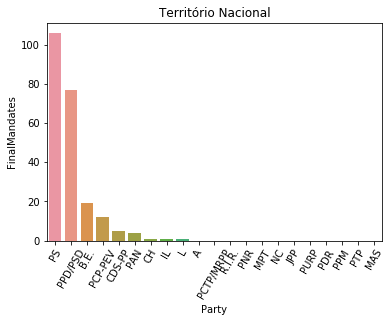

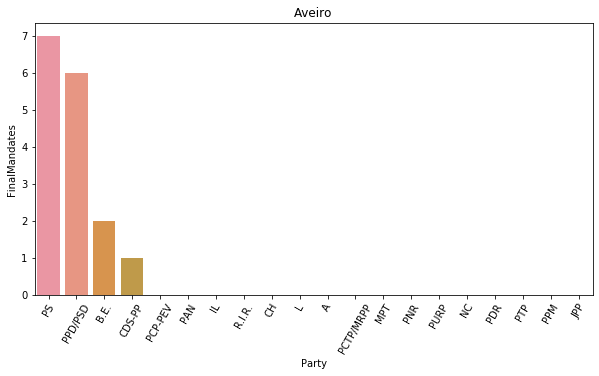

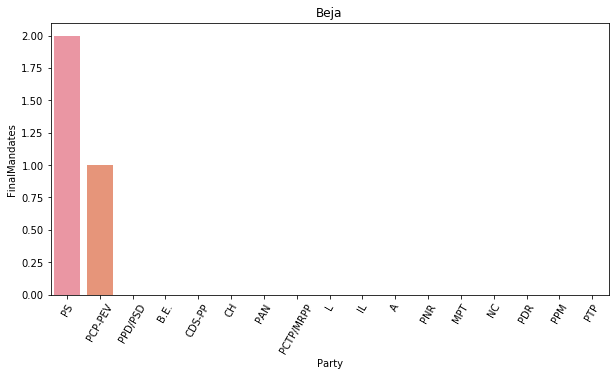

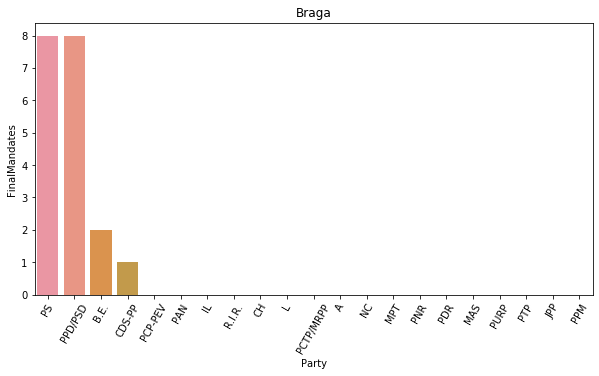

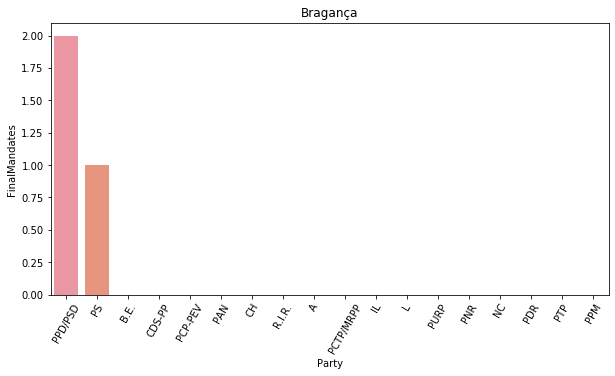

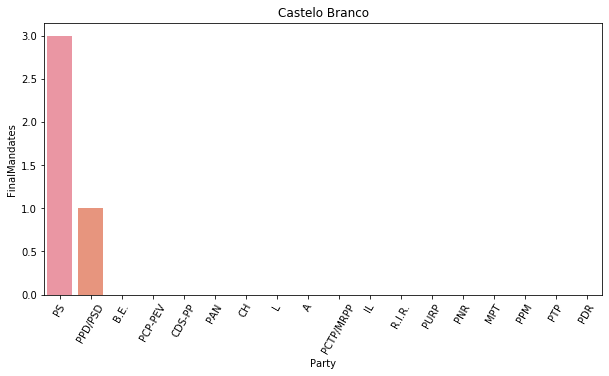

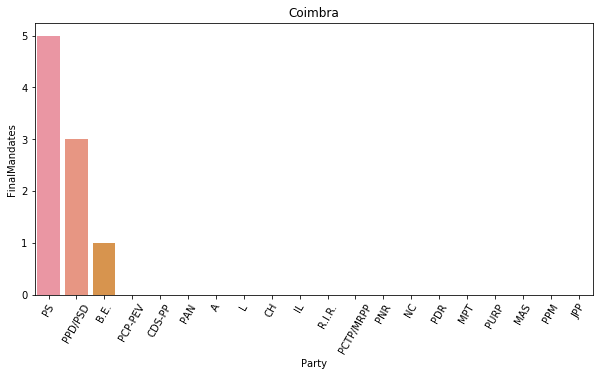

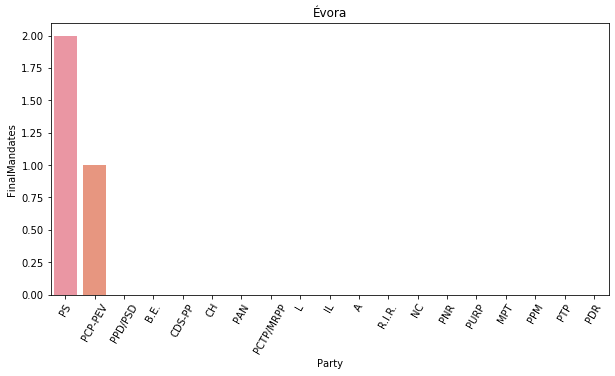

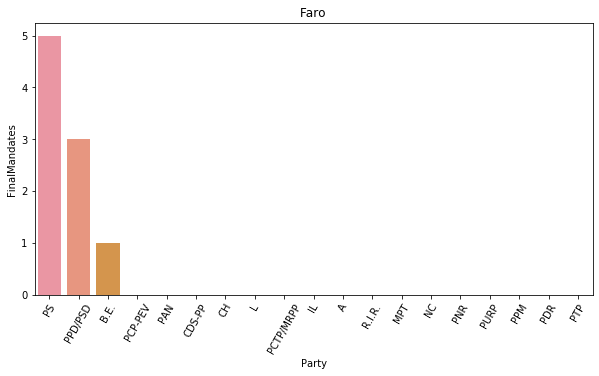

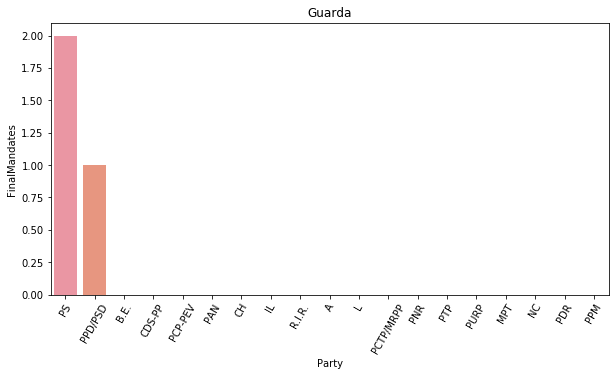

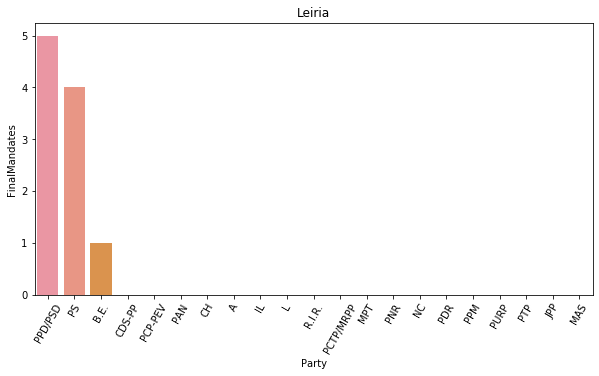

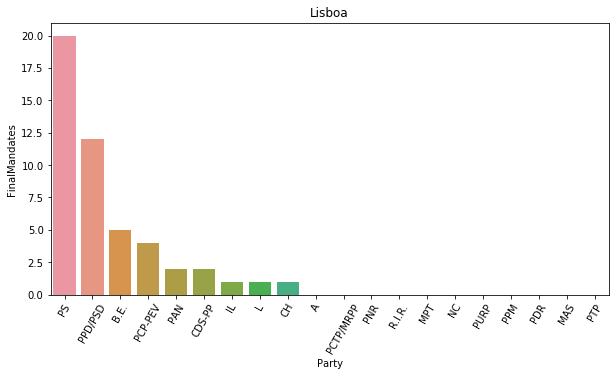

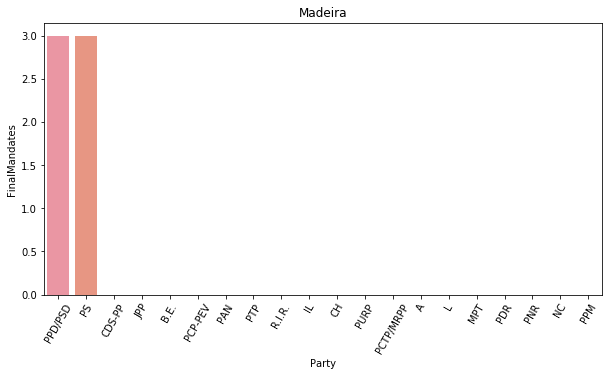

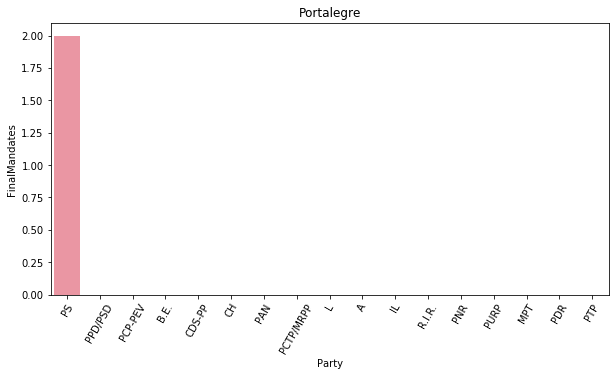

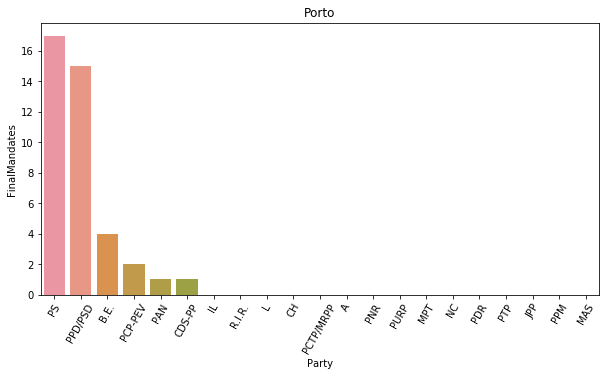

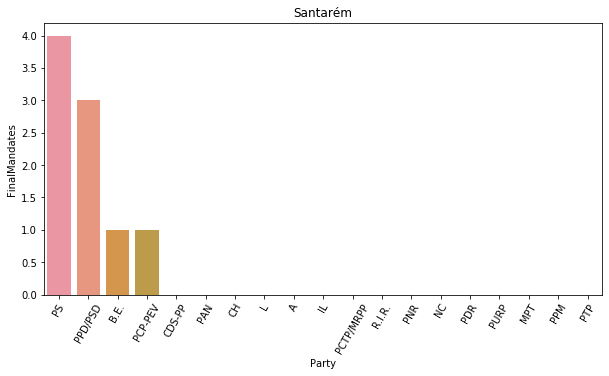

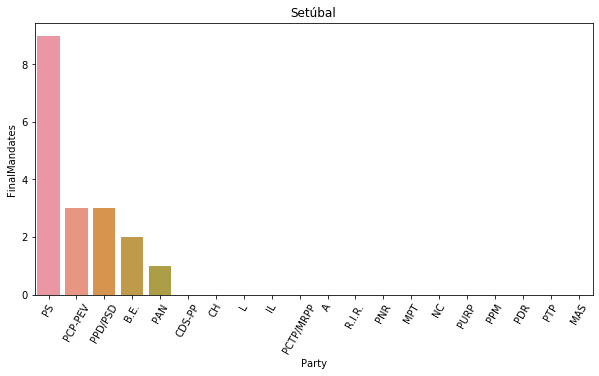

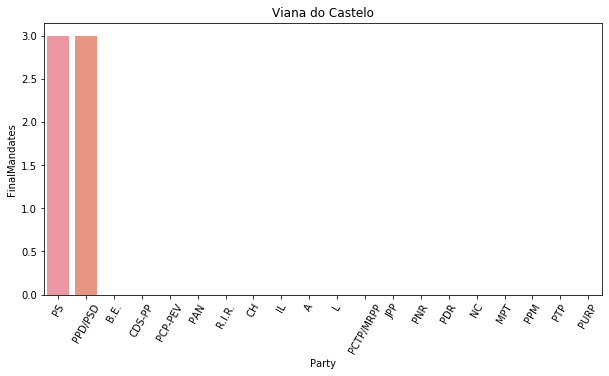

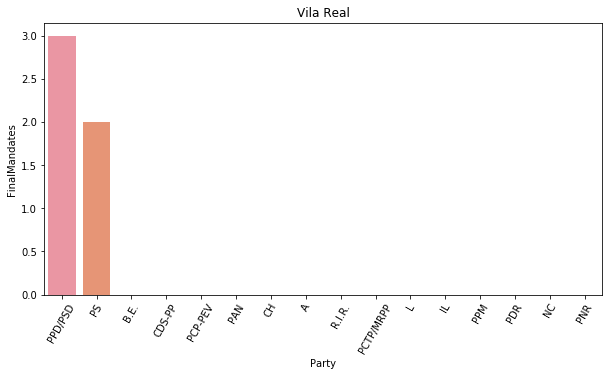

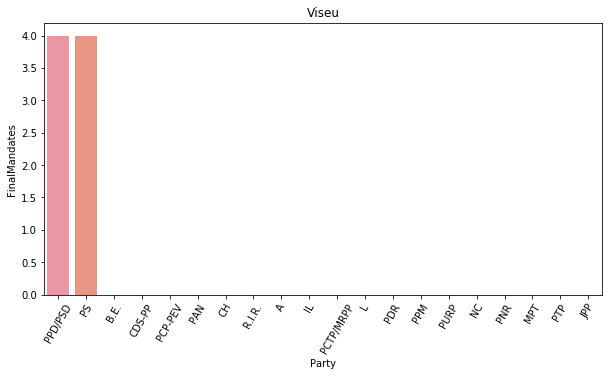

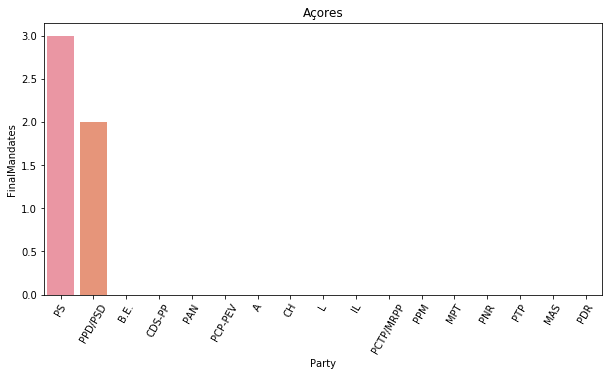

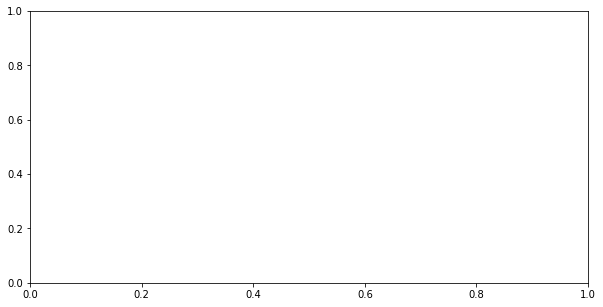

In [261]:
# Viewing MP elected in each territory party wise

df1=Election_data[Election_data['TimeElapsed']==265]
for i in Election_data['territoryName'].unique():
    plt.title(i)
    sb.barplot(x='Party',y='FinalMandates',data=df1[df1['territoryName']==i])
    print('\n',df1[df1['territoryName']==i].sort_values('FinalMandates',ascending=False)[['territoryName','Party','FinalMandates']].head(2))
    plt.xticks(rotation=60)
    plt.subplots(figsize=(10,5))

    


* IN Territorio Nacional-  Most MP elected MP's were of PS party followed by PPD/PSD 
* In Aveiro-MP's  of PS party exceeded with PPD/PSD party by 1
* IN Braga- There was a tough competition between PS and PPD/PSD Parties as both received same votes
* In Braganca- PPD/PSD took lead over PS party by 1
* IN Viana do Castelo,Viseu,Madeira- Again there was a tie
* In Portalegre- PPD/PSD received no victory over any seat

MultiIndex([(57.36, 'Portalegre')],
           names=['votersPercentage', 'territoryName'])
MultiIndex([(42.88, 'Bragança')],
           names=['votersPercentage', 'territoryName'])


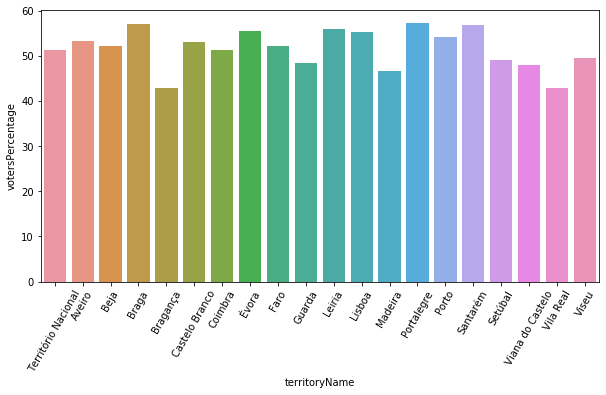

In [262]:
############### Viewing percentage of people voted in each territory############
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==0]
#df=Election_data.copy()
sb.barplot(x='territoryName',y='votersPercentage',data=df)
print(df.groupby(['votersPercentage','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['votersPercentage','territoryName']).count().sort_index().head(1).index)

* Maximum percentage of people voted in Portalegre
* Min percentage of people voted in Branganca

MultiIndex([(3.87, 'Leiria')],
           names=['blankVotesPercentage', 'territoryName'])
MultiIndex([(0.59, 'Madeira')],
           names=['blankVotesPercentage', 'territoryName'])


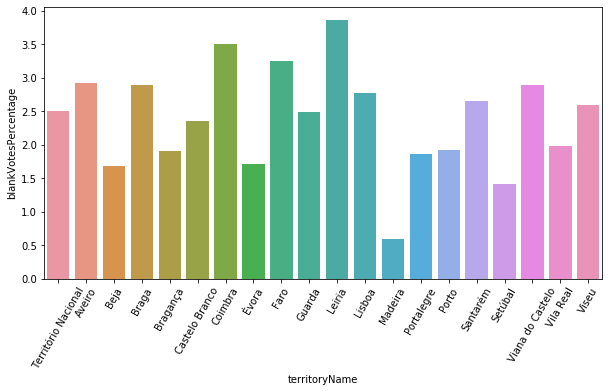

In [263]:
############### Viewing blank votes percentage in each territory############
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==0]
#df=Election_data.copy()
sb.barplot(x='territoryName',y='blankVotesPercentage',data=df)
print(df.groupby(['blankVotesPercentage','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['blankVotesPercentage','territoryName']).count().sort_index().head(1).index)

* In Leiria maximum percentage of blank votes was seen
* Min blank votes was in Madeira

MultiIndex([(51.42, 'Leiria')],
           names=['validVotesPercentage', 'territoryName'])
MultiIndex([(0.02, 'Território Nacional')],
           names=['validVotesPercentage', 'territoryName'])


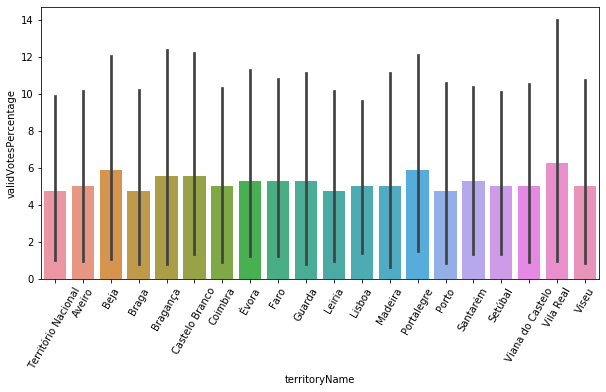

In [424]:
# Viewing territory wise  valid votes percentage of the party
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==5]
#df=Election_data.copy()
sb.barplot(x='territoryName',y='validVotesPercentage',data=df)
print(df.groupby(['validVotesPercentage','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['validVotesPercentage','territoryName']).count().sort_index().head(1).index)

MultiIndex([(3092, 'Território Nacional')],
           names=['numParishesApproved', 'territoryName'])
MultiIndex([(54, 'Madeira')],
           names=['numParishesApproved', 'territoryName'])


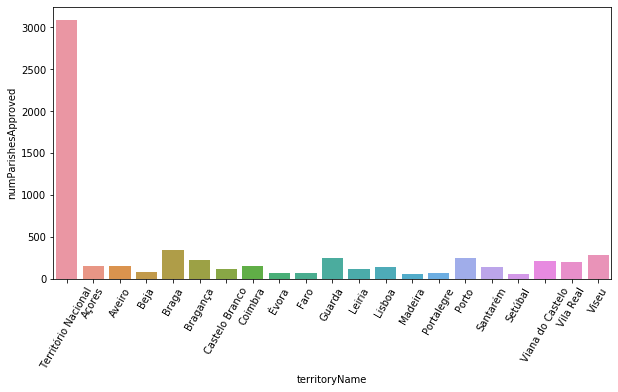

In [451]:
############### Viewing no of parishes approved in each territory############
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==265]
#df=Election_data.copy()
sb.barplot(x='territoryName',y='numParishesApproved',data=df)
print(df.groupby(['numParishesApproved','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['numParishesApproved','territoryName']).count().sort_index().head(1).index)

* Maximum Parishes approved in Território Nacional 
* min Parishes approved in Madeira

MultiIndex([(2.68, 'Guarda')],
           names=['nullVotesPercentage', 'territoryName'])
MultiIndex([(1.41, 'Évora')],
           names=['nullVotesPercentage', 'territoryName'])


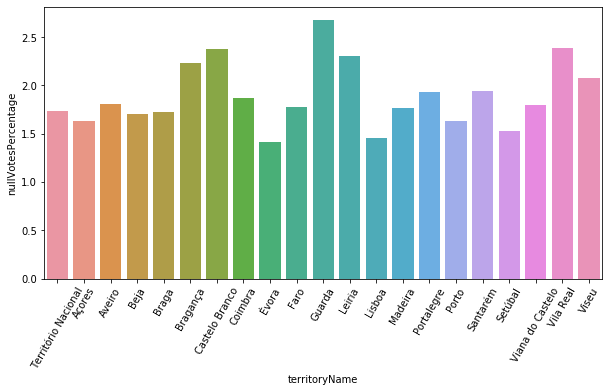

In [454]:
############### Viewing null votes percentage in each territory############
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
df=Election_data[Election_data['TimeElapsed']==265]
#df=Election_data.copy()
sb.barplot(x='territoryName',y='nullVotesPercentage',data=df)
print(df.groupby(['nullVotesPercentage','territoryName']).count().sort_index(ascending=False).head(1).index)
print(df.groupby(['nullVotesPercentage','territoryName']).count().sort_index().head(1).index)

* Guarda got maximu, null votes till the last time data is collected 
* Évora got min null votes till the last time data is collected

In [264]:
Election_data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotesPercentage,nullVotesPercentage,votersPercentage,totalVoters,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Mandates,validVotesPercentage,Votes,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,2.5,2.3,51.36,386497,1.94,1.91,52.66,PS,0,40.22,147993,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,2.5,2.3,51.36,386497,1.94,1.91,52.66,PPD/PSD,0,34.95,128624,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,2.5,2.3,51.36,386497,1.94,1.91,52.66,B.E.,0,7.15,26307,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,2.5,2.3,51.36,386497,1.94,1.91,52.66,CDS-PP,0,5.14,18923,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,2.5,2.3,51.36,386497,1.94,1.91,52.66,PCP-PEV,0,4.83,17757,12


In [265]:
Election_data.shape

(21643, 19)

#### Label Encoding String data:

In [393]:
from sklearn.preprocessing import LabelEncoder
election_data=Election_data.copy()
le_ter=LabelEncoder()
le_party=LabelEncoder()
le_party.fit(election_data['Party'])
le_ter.fit(election_data['territoryName'])
election_data['territoryName']=le_ter.transform(election_data['territoryName'])
election_data['Party']=le_party.transform(election_data['Party'])
election_data['validVotesPercentage']=election_data['validVotesPercentage'].astype(int)

#### Note: We will not be removing Outliers from this dataset since every row has vital information which cannot be dropped.Therefore we will proceed with normalization instead of removing Outliers

#### Checking skewness

In [394]:
election_data.skew()

TimeElapsed                 -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotesPercentage         0.069627
nullVotesPercentage          0.855419
votersPercentage            -1.158029
totalVoters                  4.541364
pre.blankVotesPercentage     0.021609
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
Party                       -0.083536
Mandates                    16.576658
validVotesPercentage         2.550267
Votes                       13.940573
FinalMandates               12.402865
dtype: float64

In [395]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pt=[]
k=0
for i in election_data.drop('time',axis=1).columns:
    if((abs(election_data[i].skew())>0.55) & (i!='totalVoters') & (i!='FinalMandates')):
        pt.append(PowerTransformer())
        pt[k].fit(election_data[i].values.reshape(-1,1))
        election_data[i]=pt[k].transform(election_data[i].values.reshape(-1,1))
        k=k+1
election_data['FinalMandates']=election_data['FinalMandates']+1
election_data['FinalMandates']=np.log(election_data['FinalMandates'])
election_data['totalVoters']=np.log(election_data['totalVoters'])
election_data.skew()

TimeElapsed                -0.005496
territoryName              -0.025884
totalMandates               0.034522
availableMandates           0.201209
numParishes                 0.041984
numParishesApproved        -0.044717
blankVotesPercentage        0.069627
nullVotesPercentage         0.039701
votersPercentage           -0.033572
totalVoters                 0.091369
pre.blankVotesPercentage    0.021609
pre.nullVotesPercentage     0.004264
pre.votersPercentage       -0.184101
Party                      -0.083536
Mandates                    2.551493
validVotesPercentage        0.709315
Votes                       0.009152
FinalMandates               3.196053
dtype: float64

* Most skewness is handled

In [396]:
election_data['FinalMandates'].unique()

array([4.67282883, 4.35670883, 2.99573227, 1.79175947, 2.56494936,
       1.60943791, 0.69314718, 0.        , 1.94591015, 2.07944154,
       1.09861229, 2.19722458, 1.38629436, 3.04452244, 2.89037176,
       2.77258872, 2.30258509])

In [407]:
x=election_data.drop(['time','FinalMandates'],axis=1)
y=election_data['FinalMandates']

In [410]:
pd.DataFrame(y)['FinalMandates'].unique()

array([4.67282883, 4.35670883, 2.99573227, 1.79175947, 2.56494936,
       1.60943791, 0.69314718, 0.        , 1.94591015, 2.07944154,
       1.09861229, 2.19722458, 1.38629436, 3.04452244, 2.89037176,
       2.77258872, 2.30258509])

#### Scaling data

In [398]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x_ss=ss.transform(x)

In [399]:
########### Again checking skewness after scaling the data #################
pd.DataFrame(x_ss).skew()

0    -0.005496
1    -0.025884
2     0.034522
3     0.201209
4     0.041984
5    -0.044717
6     0.069627
7     0.039701
8    -0.033572
9     0.091369
10    0.021609
11    0.004264
12   -0.184101
13   -0.083536
14    2.551493
15    0.709315
16    0.009152
dtype: float64

#### Model Preparation:

In [400]:
#importing libraries for model
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [411]:
# preparing a method to get metric at best random state
def max_r2_score(x,y,test_size,model):
    max=0
    ind=0
    for i in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < r2_score(test_y,pred)):
                max=r2_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('max r2_score :',r2_score(test_y,pred),'at random state',ind)
    list_r2score.append(r2_score(test_y,pred))
    list_MSE.append(mean_squared_error(test_y,pred))
    list_MAE.append(mean_absolute_error(test_y,pred))
    list_RMSE.append(np.sqrt(mean_squared_error(test_y,pred)))
    score=cross_val_score(model,x,y,cv=5,scoring='r2')
    cross_val_r2Score.append(score.mean())

In [412]:
list_r2score=[]
list_MSE=[]
list_MAE=[]
list_RMSE=[]
cross_val_r2Score=[]
model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(alpha=0.1),
            Ridge(alpha=0.1),ElasticNet(),SVR()]
for i,k in zip(model_list,['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']):
    print('**********************************',k,'****************************************')
    max_r2_score(x_ss,y,0.3,i)

********************************** LinearRegression ****************************************
max r2_score : 0.6903736907817475 at random state 97
********************************** DecisionTree ****************************************
max r2_score : 0.9987251096296337 at random state 76
********************************** KNN ****************************************
max r2_score : 0.9919756424580694 at random state 51
********************************** Lasso ****************************************
max r2_score : 0.6123741225048747 at random state 99
********************************** Ridge ****************************************
max r2_score : 0.690374773957212 at random state 97
********************************** ElasticNet ****************************************
max r2_score : -1.2191929610105845e-05 at random state 0
********************************** SVR ****************************************
max r2_score : 0.9800173834547772 at random state 93


In [413]:
colv=['LinearReg','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']
performance_df=pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE'],columns=colv)
performance_df

,LinearReg,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR
R2,0.690374,0.998725,0.991976,0.612374,0.690375,-0.000012,0.980017
cross_val_r2Score,0.622552,0.893955,0.890690,0.550799,0.622556,0.001792,0.908931
MSE,0.128889,0.000560,0.003157,0.148411,0.128889,0.411225,0.009181
RMSE,0.359012,0.023660,0.056186,0.385241,0.359011,0.641268,0.095816
MAE,0.237260,0.000999,0.010545,0.201529,0.237260,0.416996,0.067907


* Model are not overfitted/unerfitted
* Decison Tree is giving best metrices with MSE of 0.000560 and RMSE of 0.023

### Since metrices given by DecisionTree are pretty much good hence we will not be going for hyperparameter tuning and ensemble technique to boost up the Score and therfore Finalizing the model


In [418]:
model=DecisionTreeRegressor()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=76)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('r2_score',r2_score(test_y,pred))
print('MSE ',(mean_squared_error(test_y,pred)))
print('MAE ',(mean_absolute_error(test_y,pred)))
print('MSE ',(np.sqrt(mean_squared_error(test_y,pred))))

r2_score 0.9977106244022974
MSE  0.0010052736229702558
MAE  0.0015562271592075387
MSE  0.03170605025811723


In [419]:
from sklearn.externals import joblib
joblib.dump(model,'Election_predictor.obj')

['Election_predictor.obj']